In [125]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
from matplotlib import pyplot as plt

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [126]:
!wget https://raw.githubusercontent.com/alexeygrigorev/datasets/master/housing.csv

--2022-09-21 09:25:34--  https://raw.githubusercontent.com/alexeygrigorev/datasets/master/housing.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1423529 (1.4M) [text/plain]
Saving to: ‘housing.csv.2’

housing.csv.2       100%[===================>]   1.36M  --.-KB/s    in 0.03s   

2022-09-21 09:25:35 (38.9 MB/s) - ‘housing.csv.2’ saved [1423529/1423529]



In [127]:
df= pd.read_csv('housing.csv')

In [128]:
len(df)

20640

In [129]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [130]:
df.dtypes

longitude             float64
latitude              float64
housing_median_age    float64
total_rooms           float64
total_bedrooms        float64
population            float64
households            float64
median_income         float64
median_house_value    float64
ocean_proximity        object
dtype: object

<AxesSubplot:xlabel='median_house_value', ylabel='Count'>

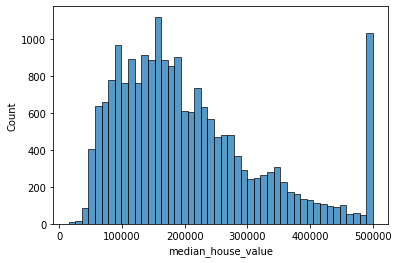

In [131]:
sns.histplot(df.median_house_value)

<AxesSubplot:xlabel='median_house_value', ylabel='Count'>

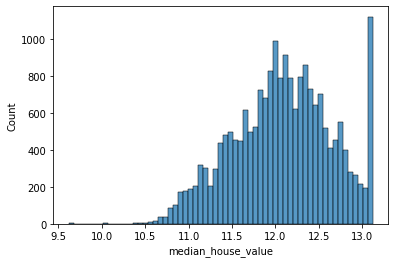

In [132]:
log_median= np.log1p(df.median_house_value)
sns.histplot(log_median)

In [133]:
df.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity'],
      dtype='object')

In [134]:
df_features= ['latitude',
'longitude',
'housing_median_age',
'total_rooms',
'total_bedrooms',
'population',
'households',
'median_income',
'median_house_value']

df.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [135]:
df_used= df[df_features]

# Q1

In [136]:
df_used.isnull().sum()

latitude                0
longitude               0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
dtype: int64

# Q2

In [137]:
df_used.population.describe()

count    20640.000000
mean      1425.476744
std       1132.462122
min          3.000000
25%        787.000000
50%       1166.000000
75%       1725.000000
max      35682.000000
Name: population, dtype: float64

In [138]:
df_used.median_house_value.describe()

count     20640.000000
mean     206855.816909
std      115395.615874
min       14999.000000
25%      119600.000000
50%      179700.000000
75%      264725.000000
max      500001.000000
Name: median_house_value, dtype: float64

## Validation framework

In [139]:
n= len(df_used)

n_test= int(0.2*n)
n_val= int(0.2*(n))
n_train= int(n- (n_val +n_test))



In [140]:
df_used


,latitude,longitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,37.88,-122.23,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0
1,37.86,-122.22,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0
2,37.85,-122.24,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0
3,37.85,-122.25,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0
4,37.85,-122.25,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0
...,...,...,...,...,...,...,...,...,...
20635,39.48,-121.09,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0
20636,39.49,-121.21,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0
20637,39.43,-121.22,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0
20638,39.43,-121.32,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0


In [141]:
np.random.seed(42)

idx= np.arange(n)

np.random.shuffle(idx)

df_used_shuf= df_used.iloc[idx]

df_train=df_used_shuf.iloc[:n_train].copy()

df_val=df_used_shuf.iloc[n_train:n_train+n_val].copy()

df_test= df_used_shuf.iloc[n_train+n_val:].copy()

In [142]:
df_train.describe()

,latitude,longitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,12384.000000,12384.000000,12384.000000,12384.000000,12177.000000,12384.000000,12384.000000,12384.000000,12384.000000
mean,35.610346,-119.555670,28.699855,2619.001453,533.480332,1413.292151,495.653666,3.871533,207099.408995
std,2.130254,1.997588,12.643342,2193.231114,422.223754,1115.069002,381.551044,1.891883,115165.856560
min,32.540000,-124.350000,1.000000,2.000000,2.000000,6.000000,2.000000,0.499900,14999.000000
25%,33.930000,-121.780000,18.000000,1441.000000,295.000000,781.000000,278.000000,2.566350,120000.000000
50%,34.250000,-118.490000,29.000000,2116.500000,431.000000,1159.000000,406.000000,3.547500,180500.000000
75%,37.710000,-118.000000,37.000000,3124.500000,641.000000,1706.000000,600.000000,4.742600,265900.000000
max,41.950000,-114.490000,52.000000,39320.000000,6445.000000,28566.000000,6082.000000,15.000100,500001.000000


## Testing row_shuffle

np.random.seed(2)
idx_test= np.arange(5)

np.random.shuffle(idx_test)



In [143]:
y_train_original= df_train.median_house_value.values

y_val_original= df_val.median_house_value.values

y_test_original= df_test.median_house_value.values


## Apply the log transformation to the median_house_value variable using the np.log1p() function.

y_train= np.log1p(y_train_original)

y_val= np.log1p(y_val_original)

y_test=np.log1p(y_test_original)

del df_train['median_house_value']
del df_val['median_house_value']
del df_test['median_house_value']

In [144]:
y_train_original.mean()

207099.40899547804

### solve Ax=b

- In our linear regression x= w(weight) 

- to find w we use  w= inverse(AT**.** A)**.** AT **.** b , this solution is used in the function used for training the model.
 
 T('Stands for transpose')

In [145]:
def train_linear_regression(X,y):
    ones= np.ones(X.shape[0]) # for making array of ones with the same size as X.shape[0]
    X= np.column_stack([ones, X]) # column_stack this ones array in the X matrix. This step helps us having one matrix that includes w0 and rest of w's when we use the linear reg eqaution to find w. 
    XTX= X.T.dot(X)
    XTX_inv= np.linalg.inv(XTX)
    w = XTX_inv.dot(X.T).dot(y)
    return w[0],w[1:] #the function returns w0 and the rest of w's from w variable above

# Baseline solution

In [146]:
base_features= ['latitude',
'longitude',
'housing_median_age',
'total_rooms',
'total_bedrooms',
'population',
'households',
'median_income',
]

In [147]:
def prepare_X(df): # prepare the X so that it equals the values of each feature
    df_num= df[base_features]
    df_num= df.fillna(0)
    X=df_num.values
    
    return X

In [164]:
def prepare_X_fill_mean(df): # prepare the X so that it equals the values of each feature
    df_num= df[base_features]
    df_num= df.fillna(207099.40899547804)
    X=df_num.values
    
    return X

In [175]:

X_train= prepare_X(df_train)

w_0, w= train_linear_regression(X_train, y_train)

In [176]:
y_pred1= w_0 + X_train.dot(w)

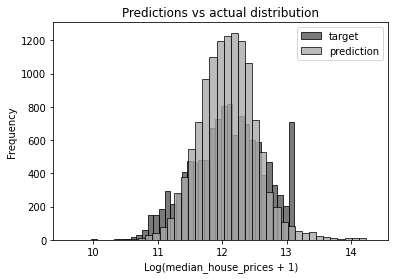

In [177]:
plt.figure(figsize=(6, 4))

sns.histplot(y_train, label='target', color='#222222', alpha=0.6, bins=40)
sns.histplot(y_pred1, label='prediction', color='#aaaaaa', alpha=0.8, bins=40)

plt.legend()

plt.ylabel('Frequency')
plt.xlabel('Log(median_house_prices + 1)')
plt.title('Predictions vs actual distribution')

plt.show()

## Root Mean Squared Error that helps us evalute our model so that we can improve it

In [178]:
def rmse(y_pred, y_actual): # root mean square error
    
    error = y_pred-y_actual
    
    mse= (error **2).mean()
    
    return np.sqrt(mse)
    

In [179]:
rmse(y_pred1, y_train)

0.3413135910156676

# Q3

In [180]:
X_train_mean= prepare_X_fill_mean(df_train)

w_0, w= train_linear_regression(X_train_mean , y_train)

y_pred2 = w_0 + X_train_mean.dot(w)


In [181]:
rmse(y_pred2, y_train)

0.3417256546455256

0.3413135910156676 train model with fillna(0) gives better rmse

0.3417256546455256 train model with fillna(mean of median_house_prices of y_train)give a not so good rmse

In [182]:
X_val= prepare_X(df_val)
w_0, w= train_linear_regression(X_train, y_train)
y_pred3= w_0 +X_val.dot(w)

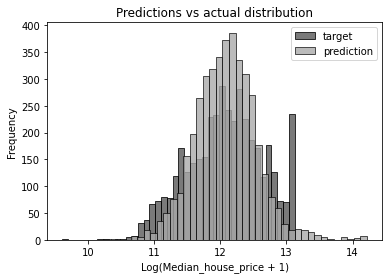

In [183]:
plt.figure(figsize=(6, 4))

sns.histplot(y_val, label='target', color='#222222', alpha=0.6, bins=40)
sns.histplot(y_pred3, label='prediction', color='#aaaaaa', alpha=0.8, bins = 40)

plt.legend()

plt.ylabel('Frequency')
plt.xlabel('Log(Median_house_price + 1)')
plt.title('Predictions vs actual distribution')

plt.show()

In [185]:
rmse(y_pred3, y_val)

0.3295330365227974

# Q4

In [186]:
def train_linear_regression_reg(X, y , r):
    ones= np.ones(X.shape[0])
    X = np.column_stack([ones, X])
    XTX= X.T.dot(X)
    
    reg = r* np.eye(XTX.shape[0])
    XTX = XTX+ reg
    
    XTX_inv= np.linalg.inv(XTX)
    w= XTX_inv.dot(X.T).dot(y)
    
    return w[0], w[1:]
    

In [187]:
X_train_1 = prepare_X(df_train)
X_val_1 =  prepare_X(df_val)

for r in [0, 0.000001, 0.0001, 0.001, 0.01, 0.1, 1, 5, 10]:
    w_0, w = train_linear_regression_reg(X_train_1, y_train, r=r)
    
    y_pred4= w_0 + X_val.dot(w)
    
    print("%s : " %r , rmse(y_pred4, y_val).round(7))

0 :  0.329533
1e-06 :  0.329533
0.0001 :  0.329533
0.001 :  0.3295327
0.01 :  0.3295319
0.1 :  0.3296947
1 :  0.3337887
5 :  0.3392485
10 :  0.3406064


# Q5

In [188]:
rmse_score_list=[]

for s in [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]:
    np.random.seed(s)

    idx= np.arange(n)

    np.random.shuffle(idx)

    df_used_shuf= df_used.iloc[idx]

    df_train=df_used_shuf.iloc[:n_train].copy()

    df_val=df_used_shuf.iloc[n_train:n_train+n_val].copy()

    df_test= df_used_shuf.iloc[n_train+n_val:].copy()
    
    y_train_original= df_train.median_house_value.values

    y_val_original= df_val.median_house_value.values

    y_test_original= df_test.median_house_value.values


    ## Apply the log transformation to the median_house_value variable using the np.log1p() function.

    y_train= np.log1p(y_train_original)

    y_val= np.log1p(y_val_original)

    y_test=np.log1p(y_test_original)

    del df_train['median_house_value']  
    del df_val['median_house_value']
    del df_test['median_house_value']
    
    X_train= prepare_X(df_train)
    X_val= prepare_X(df_val)
    
    w_0, w= train_linear_regression(X_train, y_train)
    
    y_pred5= w_0 + X_val.dot(w)
    
    rmse_score= rmse(y_pred5, y_val)
    
    rmse_score_list.append(rmse_score)
    
    print("%s  : " %s , rmse_score)
    

0  :  0.33884304805303245
1  :  0.33623872559566276
2  :  0.33209123188331946
3  :  0.3405153609037786
4  :  0.33890240665742954
5  :  0.34348667257187426
6  :  0.3451980953099163
7  :  0.33959899274075483
8  :  0.34662308731992786
9  :  0.3365926124190445


In [189]:
rmse_score_array = np.array(rmse_score_list)

rmse_score_array

array([0.33884305, 0.33623873, 0.33209123, 0.34051536, 0.33890241,
       0.34348667, 0.3451981 , 0.33959899, 0.34662309, 0.33659261])

In [190]:
rmse_std= np.std(rmse_score_array)
round(rmse_std, 3)

0.004

# Q6

In [191]:
np.random.seed(9)

idx= np.arange(n)

np.random.shuffle(idx)
df_used_shuf= df_used.iloc[idx]

df_train=df_used_shuf.iloc[:n_train].copy()

df_val=df_used_shuf.iloc[n_train:n_train+n_val].copy()

df_test= df_used_shuf.iloc[n_train+n_val:].copy()
    
y_train_original= df_train.median_house_value.values

y_val_original= df_val.median_house_value.values

y_test_original= df_test.median_house_value.values

del df_train['median_house_value']  
del df_val['median_house_value']
del df_test['median_house_value']

In [192]:
df_final_train= pd.concat([df_train, df_val])

X_final_tarin= prepare_X(df_final_train)

X_test = prepare_X(df_test)

y_final_train = np.concatenate([y_train, y_val])

w_0 , w= train_linear_regression_reg(X_final_tarin, y_final_train, r= 0.001)

y_pred6= w_0 + X_test.dot(w)

In [193]:
rmse(y_pred6, y_test)

0.34531689143764593